In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(tf.test.is_gpu_available())
print('-'*30)
print(tf.test.gpu_device_name())
print('-'*30)
print(tf.config.list_physical_devices('GPU'))
print('-'*30)
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
------------------------------
/device:GPU:0
------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13469510917499632505
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10317004800
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7068581912755150143
physical_device_desc: "device: 0, name: NVIDIA TITAN V, pci bus id: 0000:01:00.0, compute capability: 7.0"
xla_global_id: 416903419
]


In [3]:
whole_path = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\whole_liver_seg/'
subseg_path = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\segmental_seg_vessels-subtracted-mb/'

output_dir = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions/'

print(whole_path)
print(subseg_path)
print(output_dir)

N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\whole_liver_seg/
N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\segmental_seg_vessels-subtracted-mb/
N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions/


In [4]:
whole_seg_paths = []
subseg_paths = []

for root, dirs, files in os.walk(whole_path):
    for file in files:
        if file.endswith(".nii"):
             whole_seg_paths.append(os.path.join(root, file))
                
for root, dirs, files in os.walk(subseg_path):
    for file in files:
        if file.endswith(".nii"):
             subseg_paths.append(os.path.join(root, file))

whole_seg_paths = sorted(whole_seg_paths)
subseg_paths = sorted(subseg_paths)

print(len(whole_seg_paths))
print(len(subseg_paths))

1
1


In [9]:
''' TEST SINGLE VESSEL MASK ONLY '''

' TEST SINGLE VESSEL MASK ONLY '

In [5]:
case_id = 'c_9122'

whole_seg_id = os.path.join(whole_path + case_id + '.nii')
segseg_id = os.path.join(subseg_path + case_id + '-vessels-mb.nii')

print(whole_seg_id)
print(segseg_id)

N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\whole_liver_seg/c_9122.nii
N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\segmental_seg_vessels-subtracted-mb/c_9122-vessels-mb.nii


N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\whole_liver_seg/c_9122.nii


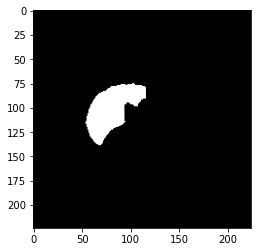

(224, 224, 27)

In [6]:
print(whole_seg_id)
whole_ni = nib.load(whole_seg_id)
whole = whole_ni.get_fdata()
whole = np.flip(np.rot90(whole), 1)

whole[whole != 0] = 1

plt.imshow(whole[:,:,12],cmap='gray')
plt.show()

whole.shape

N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\segmental_seg_vessels-subtracted-mb/c_9122-vessels-mb.nii


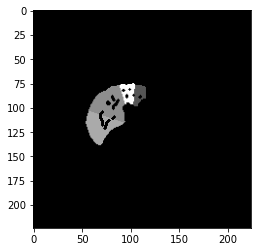

(224, 224, 27)

In [7]:
print(segseg_id)
seg_ni = nib.load(segseg_id)
seg = seg_ni.get_fdata()
seg = np.flip(np.rot90(seg), 1)

plt.imshow(seg[:,:,12], cmap='gray')
plt.show()

seg.shape

<function matplotlib.pyplot.show(close=None, block=None)>

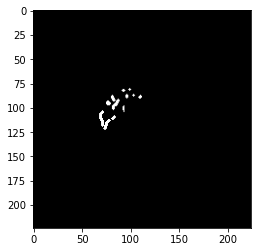

In [8]:
whole[seg != 0] = 0

plt.imshow(whole[:,:,12],cmap='gray')
plt.show

In [9]:
seg_vessel_ni = nib.Nifti1Image(np.flip(np.rot90(whole,3),0), whole_ni.affine)
nib.save(seg_vessel_ni, os.path.join(output_dir + case_id))

In [28]:
''' CREATE VESSEL MASKS FOR ENTIRE DIRECTORY '''

' CREATE VESSEL MASKS FOR ENTIRE DIRECTORY '

In [52]:
test = whole_seg_paths[:4]

In [ ]:
for i in whole_seg_paths:
    case_id = i[107:][:6]
    print(i)
    
    whole_ni = nib.load(i)
    whole = whole_ni.get_fdata()
    whole = np.flip(np.rot90(whole), 1)
    
    seg_ni = nib.load(os.path.join(subseg_path + case_id + '_edited.nii'))
    seg = seg_ni.get_fdata()
    seg = np.flip(np.rot90(seg), 1)

    whole[whole != 0] = 1
    whole[seg != 0] = 0
                      
    seg_vessel_ni = nib.Nifti1Image(np.flip(np.rot90(whole,3),0), whole_ni.affine)
    nib.save(seg_vessel_ni, os.path.join(output_dir + case_id + '.nii'))